# Exploratory Data Analysis

## 1. Introduction

This notebook will be responsible for the initial data analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 2. Load the dataset 

In [7]:
import pandas as pd

raw_data = pd.read_csv("compas-scores-two-years.csv")

raw_data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [8]:
raw_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## 3. Feature selecting

The original dataset consists of **7214** rows and **52 features**. However, several features, such as name, last name, middle name, and dates, are irrelevant to the case study. These features can be removed to focus on the most informative and relevant variables for analysis.

We will start by selecting only some features we consider relevant:

In [ ]:
relevant_features = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 
               'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid', 
               'two_year_recid', 'c_jail_in', 'c_jail_out'];

df = raw_data[relevant_features]

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid
count,7214.000000,7214.000000,6907.000000,7214.000000,7214.000000,7214.000000
mean,34.817993,3.472415,3.304763,4.509565,0.481148,0.450652
std,11.888922,4.882538,75.809505,2.856396,0.499679,0.497593
min,18.000000,0.000000,-414.000000,1.000000,0.000000,0.000000
25%,25.000000,0.000000,-1.000000,2.000000,0.000000,0.000000
50%,31.000000,2.000000,-1.000000,4.000000,0.000000,0.000000
75%,42.000000,5.000000,0.000000,7.000000,1.000000,1.000000
max,96.000000,38.000000,1057.000000,10.000000,1.000000,1.000000


## 4. Data filtering

Some records contain data quality issues based on specific context rules. For example, if the charge date of a defendant's COMPAS-scored crime does not fall within 30 days of their arrest date, the offense may not be correctly identified.

In [21]:
# Drop rows where days_b_screening_arrest is invalid
df = df[(df['days_b_screening_arrest'] <= 30) &
        (df['days_b_screening_arrest'] >= -30)]

df.describe()

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,3.246436,-1.740279,4.418503,0.484446,0.455120
std,11.730938,4.743770,5.084709,2.839463,0.499799,0.498022
min,18.000000,0.000000,-30.000000,1.000000,0.000000,0.000000
25%,25.000000,0.000000,-1.000000,2.000000,0.000000,0.000000
50%,31.000000,1.000000,-1.000000,4.000000,0.000000,0.000000
75%,42.000000,4.000000,-1.000000,7.000000,1.000000,1.000000
max,96.000000,38.000000,30.000000,10.000000,1.000000,1.000000


After data filtering, there is no more missing values in the dataset.

## 5. Feature ... (engineering?)

Among the selected features, `c_jail_in` and `c_jail_out` are in DateTime format and, on their own, provide limited value to the model. To make this information more useful, we will create a new feature `length_of_stay` that calculates the time difference between these two dates, representing the duration of the jail stay.

In [22]:
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Add a new column for length of stay
df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

# Drop the jail in and jail out columns
df = df.drop(columns=['c_jail_in', 'c_jail_out'])

Now, we can examine the correlation between the length of jail stay and the obtained COMPAS scores. This will help us understand if the duration of incarceration has any relationship with the scoring outcomes.

In [ ]:
correlation = df['length_of_stay'].corr(df['decile_score'])
print(f"Correlation between length of stay and decile score: {correlation:.2f}")

Correlation between length of stay and decile score: 0.21


## 6. Demographic Breakdown



,Race,Percentage
0,African-American,51.23%
1,Caucasian,34.02%
2,Hispanic,8.83%
3,Asian,0.44%
4,Native American,0.25%


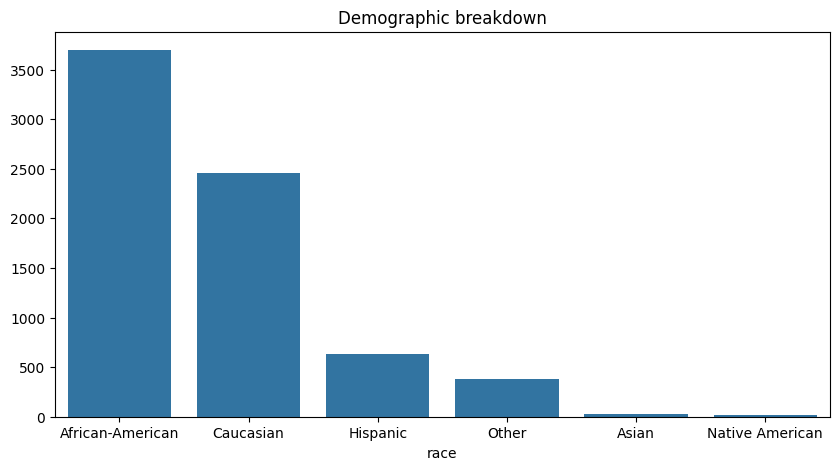

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
 
races = df['race'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=races.index, y=races.values)
plt.title('Demographic breakdown')

data = {
    "Race": ["African-American", "Caucasian", "Hispanic", "Asian", "Native American"],
    "Percentage": [
        f"{races.get('African-American', 0) / len(df) * 100:.2f}%",
        f"{races.get('Caucasian', 0) / len(df) * 100:.2f}%",
        f"{races.get('Hispanic', 0) / len(df) * 100:.2f}%",
        f"{races.get('Asian', 0) / len(df) * 100:.2f}%",
        f"{races.get('Native American', 0) / len(df) * 100:.2f}%"
    ]
}

races_df = pd.DataFrame(data)
races_df


## 7. Age Categorization

,Race,Percentage
0,Less than 25,21.19%
1,25 - 45,56.96%
2,Greater than 45,21.85%


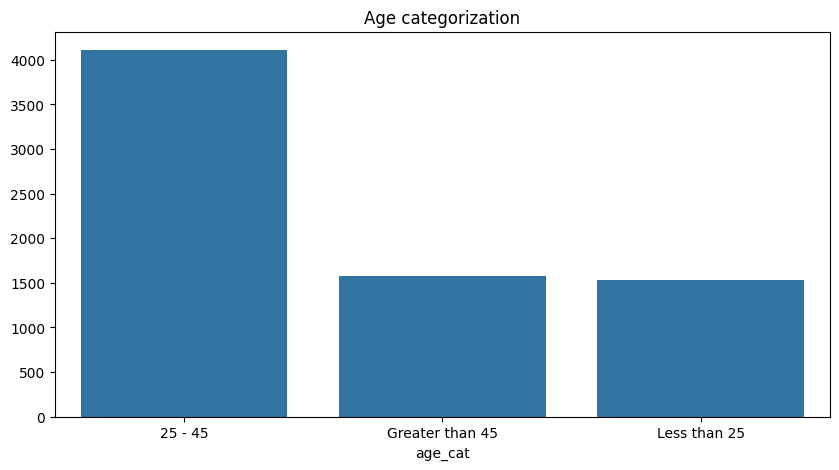

In [47]:
ages = df['age_cat'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=ages.index, y=ages.values)
plt.title('Age categorization')

data = {
    "Race": ["Less than 25", "25 - 45", "Greater than 45"],
    "Percentage": [
        f"{ages.get('Less than 25', 0) / len(df) * 100:.2f}%",
        f"{ages.get('25 - 45', 0) / len(df) * 100:.2f}%",
        f"{ages.get('Greater than 45', 0) / len(df) * 100:.2f}%"
    ]
}

ages_df = pd.DataFrame(data)
ages_df

## 8. Genre distribution

,Genre,Percentage
0,Male,80.66%
1,Female,19.34%


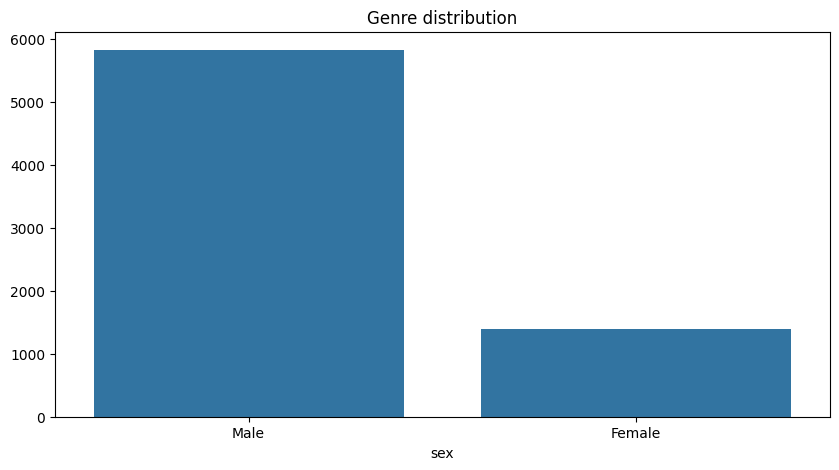

In [50]:
genres = df['sex'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=genres.index, y=genres.values)
plt.title('Genre distribution')

data = {
    "Genre": ["Male", "Female"],
    "Percentage": [
        f"{genres.get('Male', 0) / len(df) * 100:.2f}%",
        f"{genres.get('Female', 0) / len(df) * 100:.2f}%"
    ]
}

genres_df = pd.DataFrame(data)
genres_df

## 9. Two-year recidivism rate

In [53]:
two_year_recid_count = df[df['two_year_recid'] == 1].shape[0]
two_year_recid_rate = (two_year_recid_count / len(df)) * 100
print(f"Two-year recidivism rate: {two_year_recid_rate:.2f}%")

Two-year recidivism rate: 45.07%


## 10. Decile_score distribution by Race for African-American and Caucasian defendants

This cell visualizes the distribution of **decile_score** values for African-American and Caucasian defendants, providing insight into score differences across racial groups.

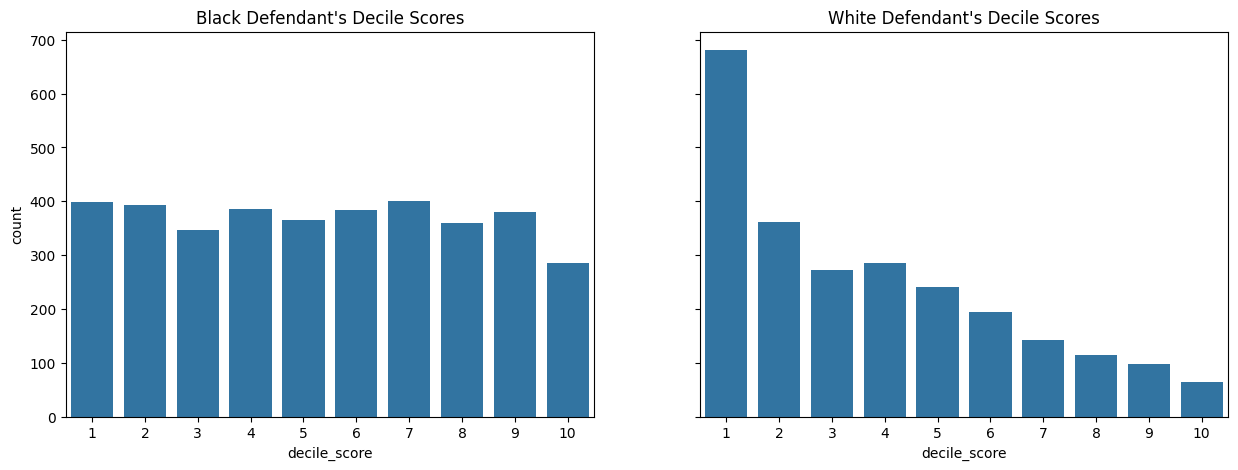

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x="decile_score", data=df[df['race'] == "African-American"], ax=axes[0])
axes[0].set_title("Black Defendant's Decile Scores")
sns.countplot(x="decile_score", data=df[df['race'] == "Caucasian"], ax=axes[1])
axes[1].set_title("White Defendant's Decile Scores")
plt.show()